In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setting numpy random seed for consistency

np.random.seed(1234)

In [2]:

# Test function 1: Convex 2d- Quadratic
n_dim = 2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return np.dot(A,x) - b





In [3]:
# To be removed!!!

# testing cell

A=np.array([[5.,4],[4.,5.]])
b=np.array([7.,2.])

x = np.array([1,2])
print(A)
print(np.dot(A,x))
print(np.dot(x,np.dot(A,x)))
print(np.dot(b,x))
print(get_value([1,2]))
print(get_gradient([3,-2]))

[[5. 4.]
 [4. 5.]]
[13. 14.]
41.0
11.0
9.5
[0. 0.]


# Question 1:

Assume you are given access to the value and gradient oracles. (Two examples for testing given above called f1 and f2). You are allowed to access the function only through these oracles. 

1. Complete the code for gradient descent with different step size schemes. (one of them given for free)

2. On f1, plot the the error vs iteration and trajectory plots for constant step sizes with the following values of eta: [0.1, 0.2, 0.23]. (20 Iterations should be sufficient)

3. On f1, Plot the error vs iteration and trajectory plots for AG and FR rules. (20 Iterations should be sufficient)

4. On f2, plot the the error vs iteration and trajectory plots for constant step size eta=1.5 with three different random initialisations drawn from N(0,0.01).  (20 Iterations should be sufficient)

5. On f2, Plot the error vs iteration and trajectory plots for AG and FR rules for one random initialisation from N(0,0.01). (20 Iterations should be sufficient)

6. Create a Markdown cell and give your findings for questions 2 and 3 above in them in an itemised list. (For this you may look at the function definitions in the oracle to get an idea).


In [4]:
# Question 1 part 1

def gradient_descent_update(x, eta=1.):
    """
    Arguments:
    x: 1 dimensional numpy array as input. Representing x_t
    eta: step size
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing one Gradient descent step with constant step size eta.. 
    
    Notes:
    You are allowed ONLY ONE get_gradient call in this function.
    """
    grad = get_gradient(x)
    return x-eta*grad







def gradient_descent_update_AG(x, c=0.25, c_dash=0.5):
    """
    Arguments:
    x: 1 dimensional numpy array as input. Representing x_t
    c: optional parameter for specifying AG rules. (Upper bound line)
    c_dash: optional parameter for specifying AG rules. (Lower bound line)
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing one Gradient descent step with step size given by AG conditions. 
    
    Notes:
    You are allowed ONLY ONE get_gradient calls in this function.
    """
    
    # obtaining gradient and function value at x
    grad_x = get_gradient(x)
    val_x = get_value(x)
    grad_x_norm = np.dot(grad_x, grad_x)
    
    # initialize eta
    eta = 1
    
    # perform one iteration of search for eta
    x_next = x - eta*grad_x
    
    # searching for eta which satisfies AG conditions
    while not( 
        (get_value(x_next) >= val_x - c_dash*eta*grad_x_norm)
        and (get_value(x_next) <= val_x - c*eta*grad_x_norm)):
        
        # check if eta is too small
        if get_value(x_next) < val_x - c_dash*eta*grad_x_norm:
            eta_prev = eta
            # increase eta
            eta = 2*eta
            # find next x
            x_next = x - eta*grad_x
            # check if eta is now too large, if so take average
            if get_value(x_next) > val_x - c*eta*grad_x_norm:
                eta = (eta_prev + eta)/2
                x_next = x - eta*grad_x
            
            
        # alternately, if eta is too large
        elif get_value(x_next) > val_x - c*eta*grad_x_norm:
            eta_prev = eta
            # decrease eta
            eta = eta/2
            # find enxt x
            x_next = x - eta*grad_x
            # if eta is too small
            if get_value(x_next) < val_x - c_dash*eta*grad_x_norm:
                eta = (eta_prev + eta)/2
                x_next = x - eta*grad_x
    
    return x_next
                

def gradient_descent_update_FR(x, tol=1e-5):
    """
    Arguments:
    x : 1 dimensional numpy array as input. Representing x_t
    tol : tolerance parameter.
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing next iterate of Gradient descent step with step size given by full relaxation. 
    You may stop when the line search optimisation problem is solved to a tolerance given by tol.
    
    Notes:
    You are allowed a FEW get_gradient calls in this function. But be careful not to go overboard.
    """
    
    # obtaining gradient and function value at x
    grad_x = get_gradient(x)
    val_x = get_value(x)
    
    # initialize eta 
    eta = 1
    
    # compute one xnext
    x_next = x - eta*grad_x
    grad_x_next = get_gradient(x_next)
    
    while np.abs(np.dot(grad_x_next, grad_x)) > tol:
        # if eta is too small (descent directions have component along -grad(x))
        if (np.dot(grad_x_next, grad_x) > 0):
            eta_prev = eta
            eta = 2*eta
            x_next = x - eta*grad_x
            grad_x_next = get_gradient(x_next)
            # if doubling eta was too much
            if np.dot(grad_x_next, grad_x) < 0:
                eta = (eta + eta_prev)/2
                x_next = x - eta*grad_x
                grad_x_next = get_gradient(x_next)
                
        # if eta is too large
        if (np.dot(grad_x_next,grad_x) < 0):
            eta_prev = eta
            eta = eta/2
            x_next = x - eta*grad_x
            grad_x_next = get_gradient(x_next)
            # if halving eta was too much
            if np.dot(grad_x_next, grad_x) > 0:
                eta = (eta + eta_prev)/2
                x_next = x - eta*grad_x
                grad_x_next = get_gradient(x_next)
    
    return x_next



    

In [5]:
# Plot / Utility functions

def plot_error_vs_iteration(f_vals, plt_title=None):
    # Plot the loss vs iteration number
    # Argument f_vals is (n)-shape numpy array
    
    plt.figure()

    if plt_title is None:
        plt.title('Function value vs Iteration')
    else:
        plt.title(plt_title)

    plt.xlabel('Iteration : t ')
    plt.ylabel('Value : $f(x_t)$')
    plt.grid(True)
    plt.plot(f_vals)


def plot_trajectory(x_list, x_axis=None, y_axis=None, plt_title=None):
    # Trajectory plot for the special case of 2-d functions
    # Generating contour maps of function
    
    # Argument x_list is n by 2 numpy array giving n iterates in 2d. 
    
    delta=0.025
    if x_axis is None:
        x_axis = np.arange(np.min(x_list[:,0])-0.5, np.max(x_list[:,0])+0.5 , delta)
    if y_axis is None:
        y_axis = np.arange(np.min(x_list[:,1])-0.5, np.max(x_list[:,1])+0.5 , delta)

    X, Y = np.meshgrid(x_axis, y_axis)

    Z = np.zeros(X.shape)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            input_vec = np.array([X[i,j],Y[i,j]])
            Z[i,j] = get_value(input_vec) 

    levels = np.linspace(Z.min(), Z.max(), 50)

    
    plt.figure(figsize=(10,10.*Z.shape[0]/Z.shape[1]))
    if plt_title is None:
        plt.title('Gradient Descent iterate trajectory')
    else:
        plt.title(plt_title)
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.contourf(X, Y, Z, levels=levels, cmap="viridis")
    plt.colorbar()
    # Plot the trajectory
    plt.plot(x_list[:,0],x_list[:,1], marker='o', markersize=10, lw=5)



    

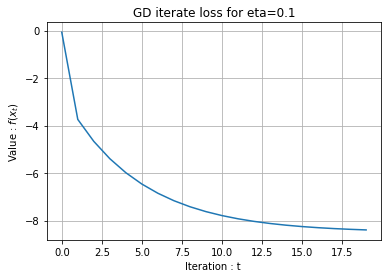

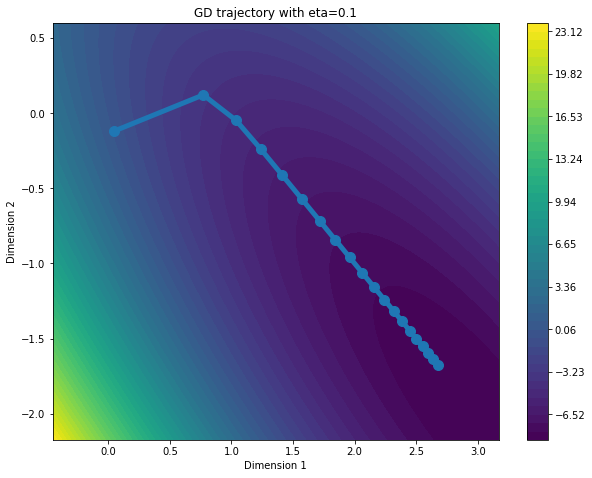

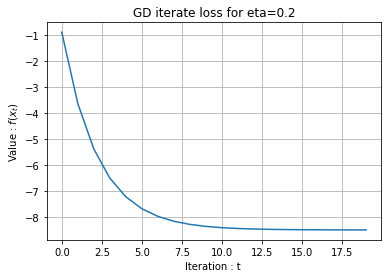

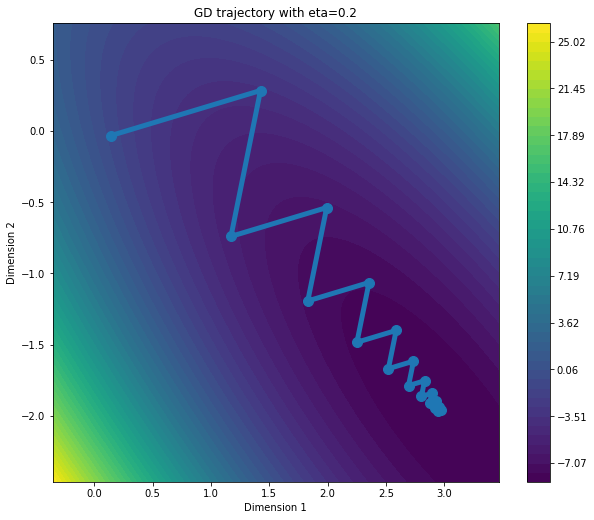

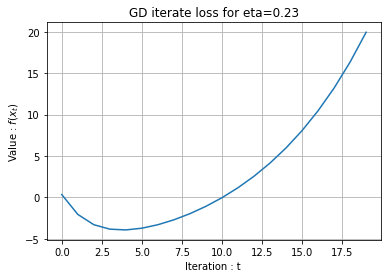

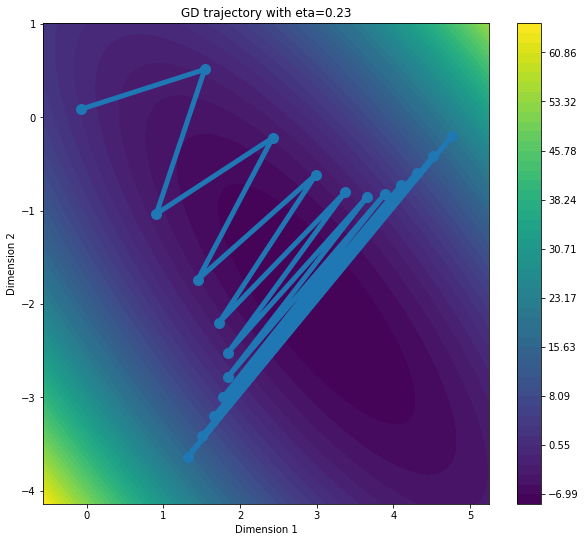

In [6]:
# Question 1 part 2:

for eta in [0.1, 0.2, 0.23]:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))
    

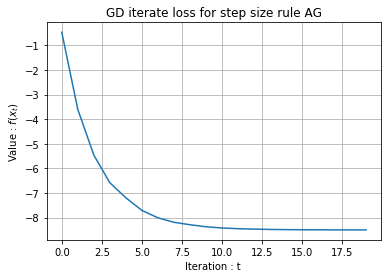

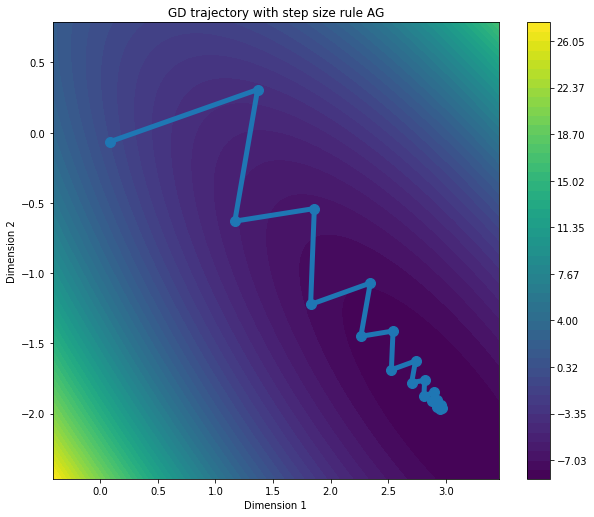

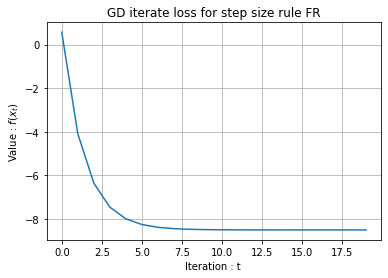

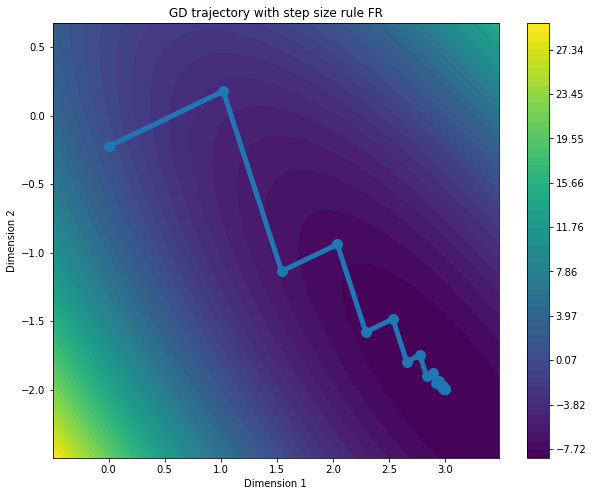

In [7]:
# Question 1 part 3:
for stepsize_rule in ['AG', 'FR']:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        if stepsize_rule=='AG':
            x = gradient_descent_update_AG(x=x) # , eta=eta) AG does not require argument eta!
        elif stepsize_rule=='FR':
            x = gradient_descent_update_FR(x=x) # , eta=eta) FR does not require argument eta
            
    x_list = np.array(x_list)
    
#     # code to test orthogonality of x_t+1 - x_t and x_t - x_t-1
#
#     if stepsize_rule == "FR":
#         for i in range(1,len(x_list)-1):
#             prev = x_list[i]- x_list[i-1]
#             after = x_list[i+1] - x_list[i]
#             print(np.dot(prev,after)/np.linalg.norm(prev)/np.linalg.norm(after))
    

    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for step size rule '+stepsize_rule)

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with step size rule '+ stepsize_rule)
    

In [8]:
# Test function 2: Non-convex 2d- function with 2 local minima
n_dim=2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    p1=np.array([0,0.5])
    p2=np.array([-0.5,0])
    g=np.array([0.01,0.01])
    
    return (np.linalg.norm(x-p1)**2)*(np.linalg.norm(x-p2)**2)+ np.dot(g,x) 

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    p1=np.array([0,0.5])
    p2=np.array([-0.5,0])
    g=np.array([0.01,0.01])

    term1= 2*(np.linalg.norm(x-p1)**2)*(x-p2)
    term2= 2*(np.linalg.norm(x-p2)**2)*(x-p1)    
    
    
    return term1+term2+g


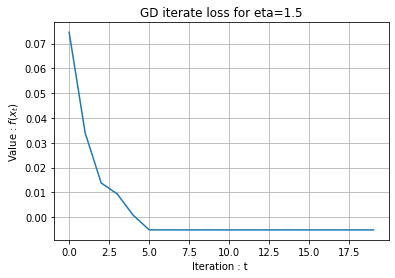

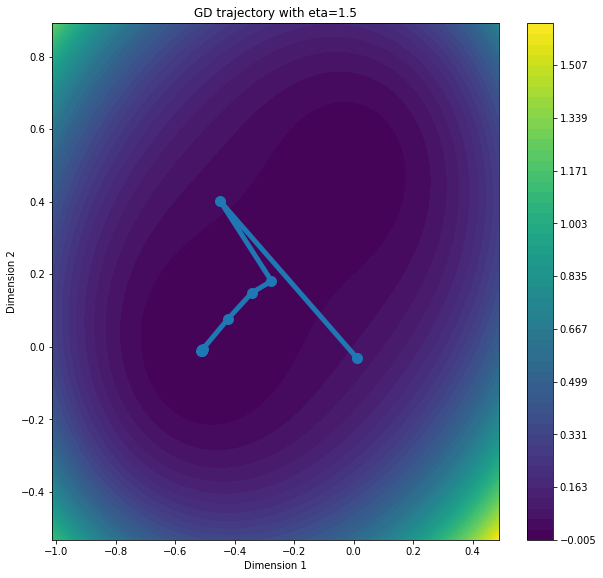

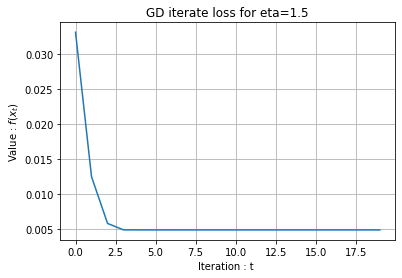

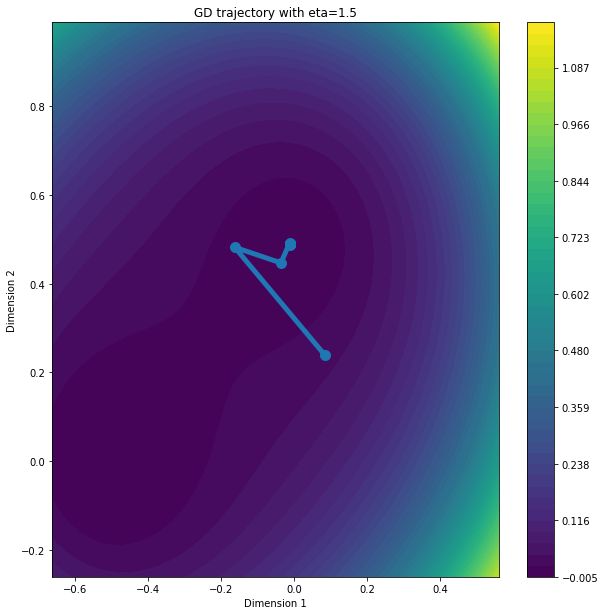

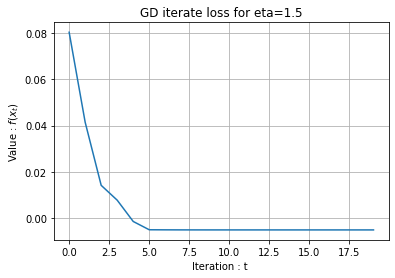

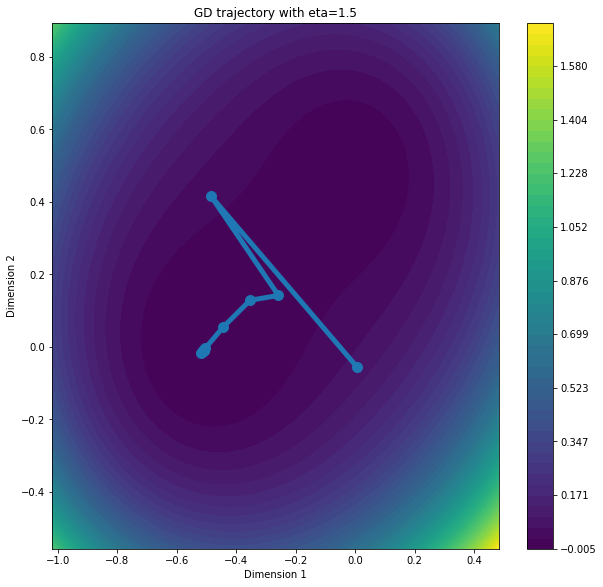

In [15]:
# Question 1, part 4

for eta in [1.5, 1.5, 1.5]:
    f_vals=[]
    x_list=[]
    x=np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):
        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
    x_list = np.array(x_list)
#     print(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))
    

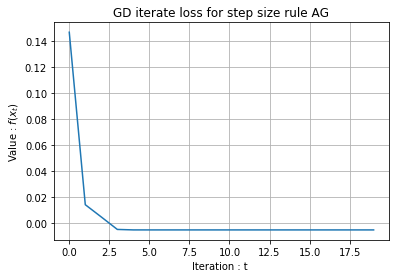

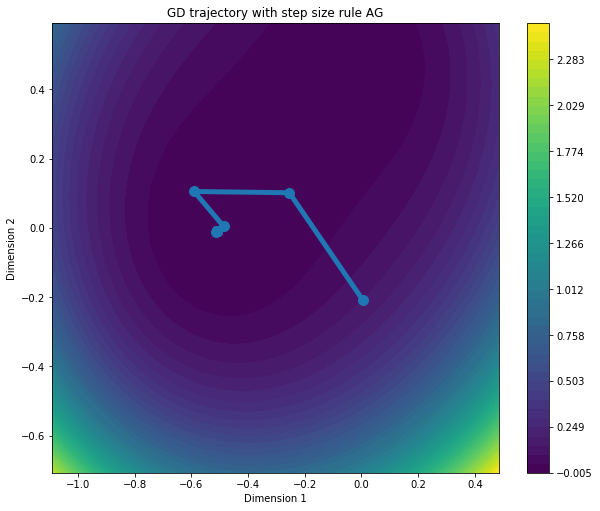

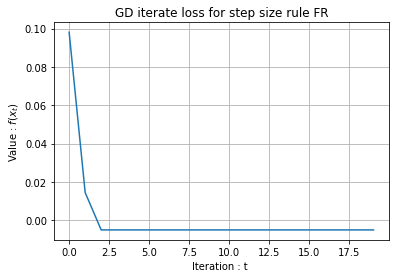

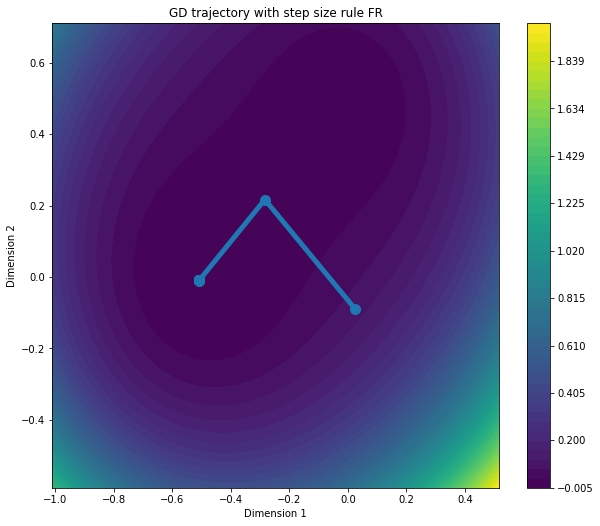

In [16]:
# Question 1 part 5:
for stepsize_rule in ['AG', 'FR']:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        if stepsize_rule=='AG':
            x = gradient_descent_update_AG(x=x) # , eta=eta), eta is not a necessary argument
        elif stepsize_rule=='FR':
            x = gradient_descent_update_FR(x=x) # , eta=eta), eta is not a necessary argument 
            
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for step size rule '+stepsize_rule)

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with step size rule '+ stepsize_rule)

### Question 1 part 6

# Question 2:

Assume you are given a value and gradient oracle to a quadratic function. Minimise this using only the oracle.

1. Write the Conjugate gradient algorithm update rule.
2. Run on f1 and generate error plot and trajectory plots. (Create a new cell for this.)
3. On a given 100-dimensional convex quadratic plot f(x_t) vs t for both Gradient descent (with full relaxation) and CGD for 20 iterations.
4. Explain your findings in a new markdown cell.


In [ ]:
#Question 2, part 1

def CG_update(x_t, d_t):
    
    """
    Arguments:
    x_t : 1 dimensional numpy array as input. Representing current iterate x_t
    d_t: represents the current direction of movement. (d_t)

    Returns:
    x_next: numpy array with same shape as x_t, representing x_{t+1}
    d_next: numpy array with same shape as d_t, representing d_{t+1}
    
    x_next corresponds to one Conjugate gradient descent step with step size given by full relaxation. 
    You may assume the function that you have oracle access to is a quadratic. But you don't know A or b. 
    You only have access to the oracles.
    You need to figure out how to get the required quantities like r_t, v^T A v using zeroth and first order oracles.
    
    Notes:
    You are allowed one get_gradient call in this function. 
    """
    pass

In [ ]:
# Test function 1: Convex 2d- Quadratic
n_dim = 2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return np.dot(A,x) - b

In [ ]:
# Question 2, part 2

f_vals=[]
x_list=[]

x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1
d=-1*get_gradient(x)

f_vals = []
for t in range(20):
    x_list.append(x)
    f_vals.append(get_value(x))    
    x, d = CG_update(x, d)
x_list = np.array(x_list)


plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))

if n_dim==2:
    plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))





In [ ]:
# Test function 3: Convex 100d- Quadratic
n_dim = 100
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.diag(np.arange(1.,n_dim+1.,1.))
    b=np.arange(1,n_dim + 1., 1.)
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.diag(np.arange(1.,n_dim+1.,1.))
    b=np.arange(1,n_dim + 1., 1.)
    return np.dot(A,x) - b

In [ ]:
# Question 2, part 3

f_vals_GD=[]
x=np.random.randn(n_dim)*0.1
for t in range(20):
    f_vals_GD.append(get_value(x))
    x = gradient_descent_update_FR(x=x)

f_vals_CGD=[]
x=np.random.randn(n_dim)*0.1
d=-1*get_gradient(x)
for t in range(20):
    f_vals_CGD.append(get_value(x))
    x, d = CG_update(x,d)
    
plt.plot(range(20),f_vals_GD, 'b-', range(20), f_vals_CGD, 'r-')



### Question 2, part 4:

